# Stack Overflow survey analysis 2019

Curious what kind of people devolopers are? lets find out some interesting facts about them!!

# Objective

**My questions of interest in this EDA will be**
- What is better open source software or proprietary / closed source software ?
- Does gender have anything to do with liking to code ?
- Which kind of a devoloper make more many?
- And other interesting observation.

Finally i will try to creat a model that will predict the incom with different models.

# Basic EDA

I will be creating a lot of plots to find some interseting facts to share.

In [160]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

sns.set(font_scale=1.5)

df = pd.read_csv('survey_results_public.csv')
df.head(3)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult


In [18]:
# checking survey_results_schema data set to look for columns of interest
df_s = pd.read_csv('survey_results_schema.csv')
for i1,i2 in zip(df_s.Column , df_s.QuestionText):
    print(f'{i1}:     {i2}')

Respondent:     Randomized respondent ID number (not in order of survey response time)
MainBranch:     Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code."
Hobbyist:     Do you code as a hobby?
OpenSourcer:     How often do you contribute to open source?
OpenSource:     How do you feel about the quality of open source software (OSS)?
Employment:     Which of the following best describes your current employment status?
Country:     In which country do you currently reside?
Student:     Are you currently enrolled in a formal, degree-granting college or university program?
EdLevel:     Which of the following best describes the highest level of formal education that you’ve completed?
UndergradMajor:     What was your main or most important field of study?
EduOther:     Which of the following types of non-degree education have you used or participated in? Please select all that apply.
OrgSize:     Approximately how many people are 

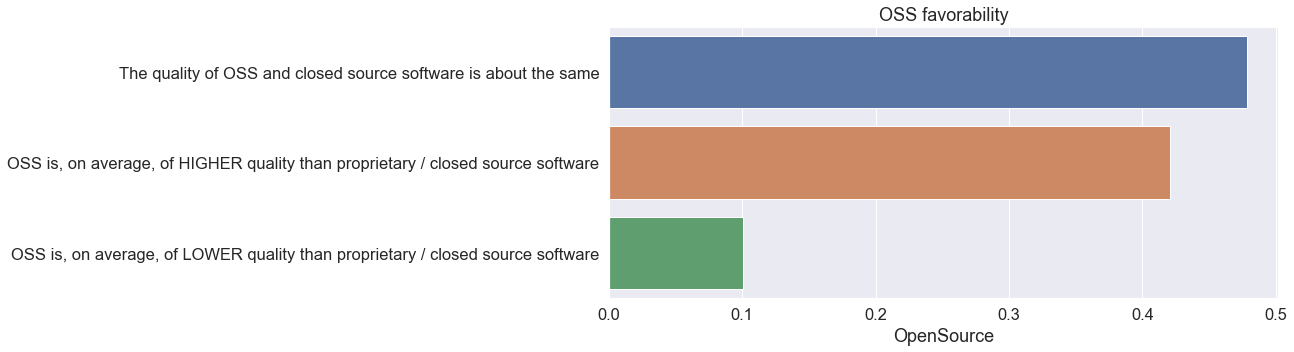

In [19]:
# checking for OSS vs proprietary / closed source software for all population
f , ax = plt.subplots(figsize=(12,5))
sns.barplot(df.OpenSource.value_counts(normalize = True) , df.OpenSource.value_counts(normalize = True).index)
plt.title('OSS favorability')
plt.show()

We can see that only 10% of all records say that, they think proprietary / closed source software is better, i my self just started learning an open source programming language called python, and i find it very strong.

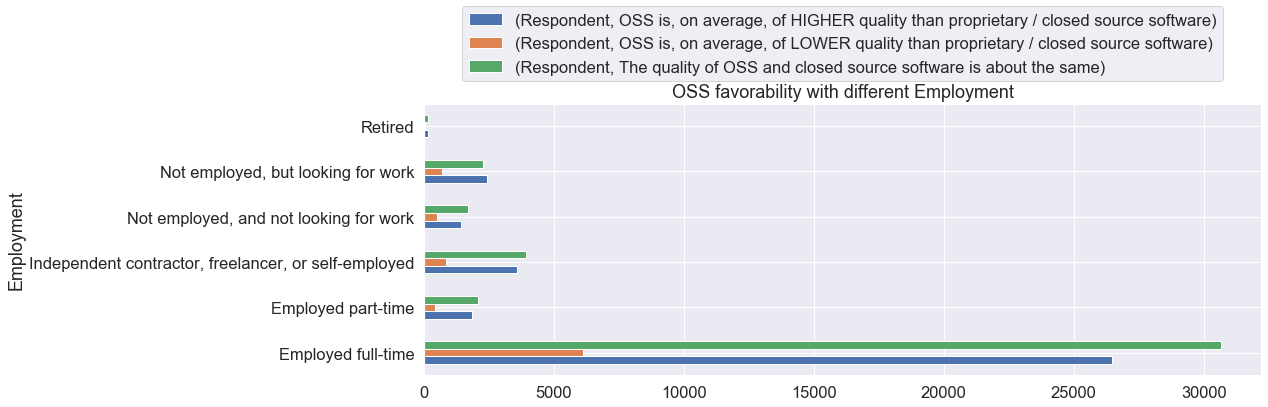

In [20]:
# checking for OSS vs proprietary / closed source software for Employment to avoid baises
df.groupby(by = ['Employment' , 'OpenSource']).count()[['Respondent']].unstack().plot.barh(figsize=(15,5))
plt.legend(loc='center', bbox_to_anchor=(0.5, 1.22))
plt.title('OSS favorability with different Employment')
plt.show()

This is the same plot with different Employment to git rid off any baisise

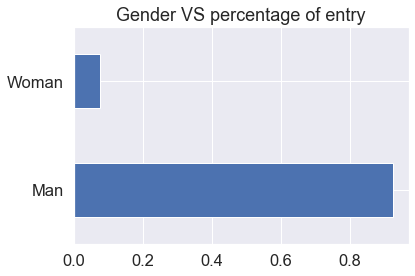

In [21]:
# checking gender for all population
df[(df.Gender == 'Man' )|(df.Gender == 'Woman') ]['Gender'].value_counts(normalize = True).plot.barh()
plt.title('Gender VS percentage of entry')
plt.show()

Next is something i kind of was hesitate to plot here, but the numbers was really shocking, which is the gender.

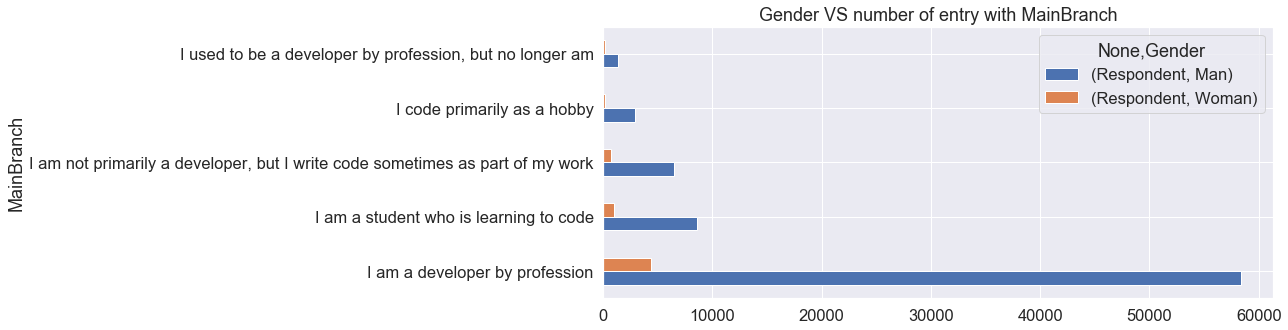

In [22]:
# checking gender for MainBranch.
df[(df.Gender == 'Man' )|(df.Gender == 'Woman') ].groupby(by = ['MainBranch' , 'Gender']).count()[['Respondent']].unstack().plot.barh(figsize=(12,5))
plt.title('Gender VS number of entry with MainBranch')
plt.show()

I'm really curios as of why is there this huge different in gender for these developers, is there any reason at all? this is also provided with different main branch.

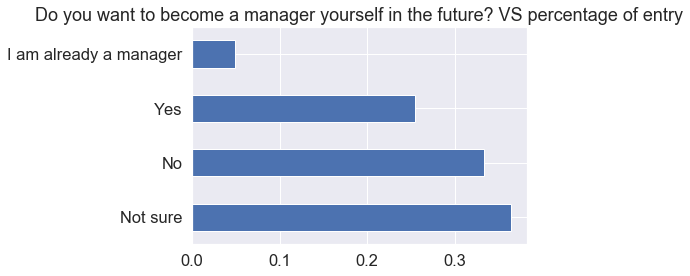

In [32]:
# check if devolopers intrested on manger positions.
df.MgrWant.value_counts(normalize = True).plot.barh()
plt.title('Do you want to become a manager yourself in the future? VS percentage of entry')
plt.show()

Next is there answer to "Do you want to become a manager yourself in the future?" and these are the result.

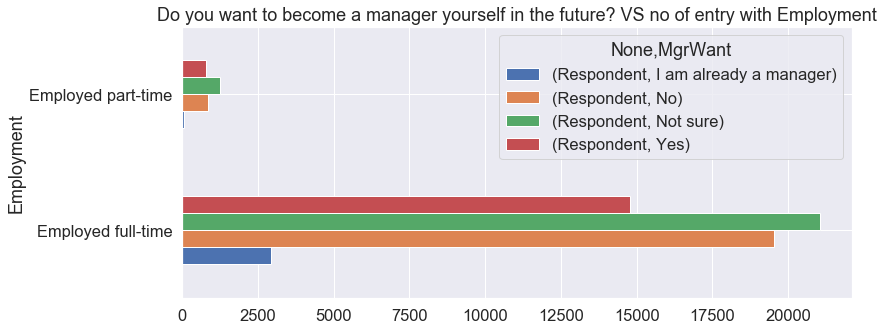

In [33]:
# ckecking if devolopers intrested on manger positions with Employment in mind.
df.groupby(by = ['Employment' , 'MgrWant']).count()[['Respondent']].unstack().plot.barh(figsize=(12,5))
plt.title('Do you want to become a manager yourself in the future? VS no of entry with Employment')
plt.show()

Surprisingly a lot of them don't want to or not sure of being a manger, also those in different employment.

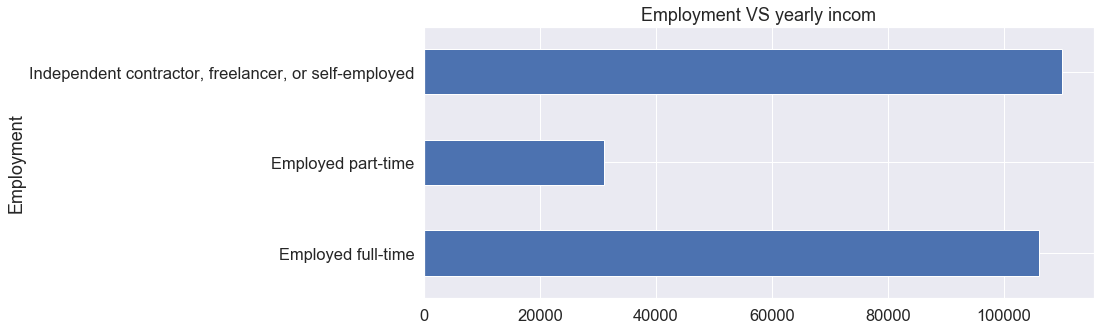

In [102]:
# checking yearly incom for differents kind of Employment, taking the median to not get affected by outliers.
df[(df.CompFreq == 'Yearly') & (df.CurrencyDesc == 'United States dollar')].groupby('Employment').median()['CompTotal'].plot.barh(figsize=(12,5))
plt.title('Employment VS yearly incom')
plt.show()

Next lets take a look at the income for for different kind of developers.
We can see that the Independent contractor, freelancer, or self-employed are the most just past the full time employee.

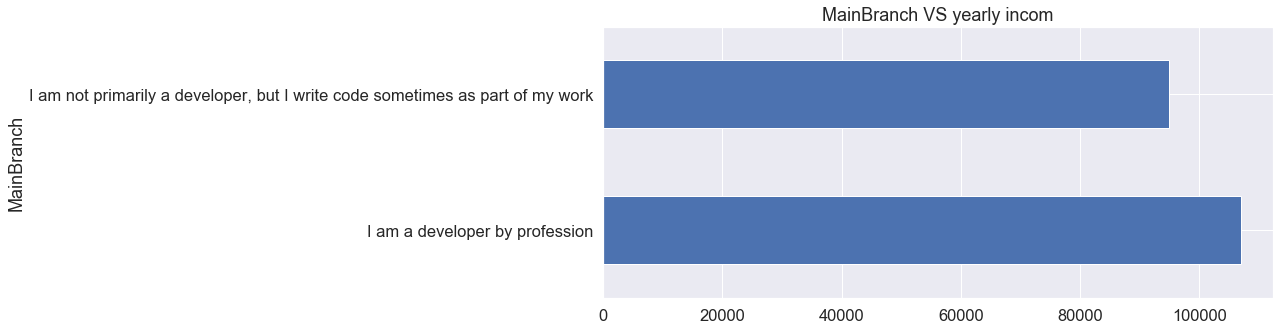

In [101]:
# checking yearly incom for differents kind of MainBranch, taking the median to not get affected by outliers.
df[(df.CompFreq == 'Yearly') & (df.CurrencyDesc == 'United States dollar')].groupby('MainBranch').median()['CompTotal'].plot.barh(figsize=(12,5))
plt.title('MainBranch VS yearly incom')
plt.show()

Make sense for the professional to make more.

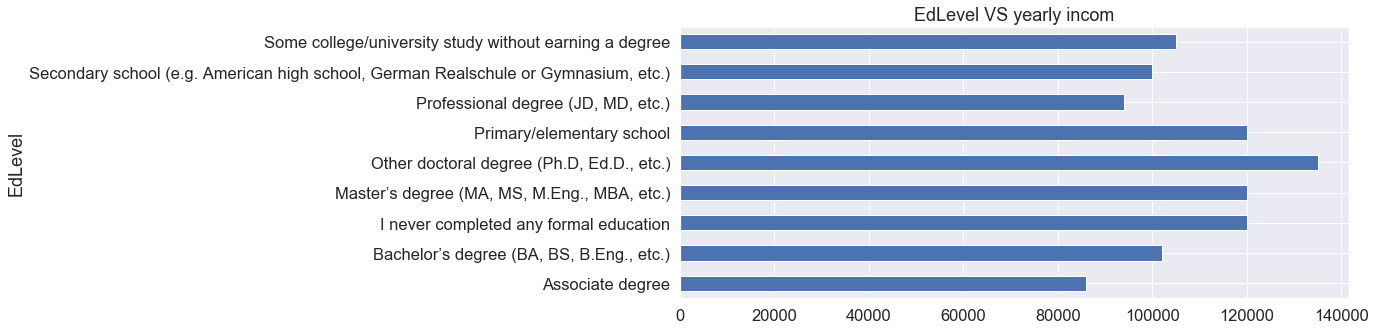

In [99]:
# checking yearly incom for differents kind of MainBranch, taking the median to not get affected by outliers.
df[(df.CompFreq == 'Yearly') & (df.CurrencyDesc == 'United States dollar')].groupby('EdLevel').median()['CompTotal'].plot.barh(figsize=(12,5))
plt.title('EdLevel VS yearly incom')
plt.show()

Make sense for the high degree to make more, but the interesting part is that those who didn't completed any formal educations are also quite high and close to them, this indicate maybe they are getting there skills throu online courses or somthing along those lines.

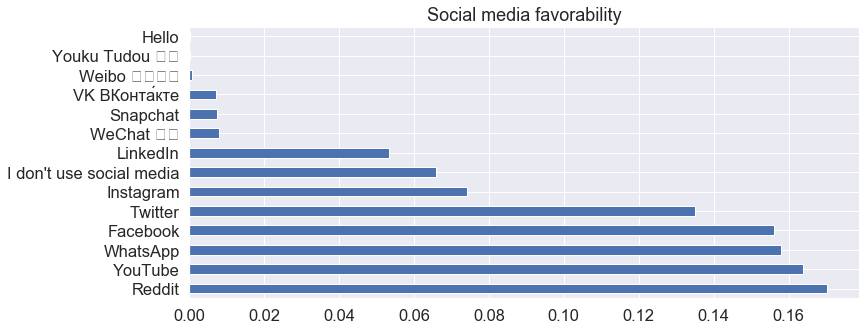

In [39]:
# checking for the most used social media 
df.SocialMedia.value_counts(normalize = True).plot.barh(figsize=(12,5))
plt.title('Social media favorability')
plt.show()

And the last thing is what social media are used the most.

# Machine learning

In [391]:
# To predict the incom we need to make sure all of them is yearlly intered
df_new = df[(df.CompFreq == 'Yearly')]
df_new.head(3)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
8,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
9,10,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,India,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Somewhat less welcome now than last year,Tech articles written by other developers;Tech...,NaN,NaN,NaN,NaN,NaN,Yes,Too long,Difficult


In [392]:
# I will drop any row that have incom as null
df_new.dropna(subset=['CompTotal'] , axis=0 , inplace=True)

C:\Users\Satoshi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [393]:
# cheaking for nulls
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30538 entries, 3 to 88330
Data columns (total 85 columns):
Respondent                30538 non-null int64
MainBranch                30538 non-null object
Hobbyist                  30538 non-null object
OpenSourcer               30538 non-null object
OpenSource                30116 non-null object
Employment                30486 non-null object
Country                   30538 non-null object
Student                   30439 non-null object
EdLevel                   30146 non-null object
UndergradMajor            28650 non-null object
EduOther                  29883 non-null object
OrgSize                   30049 non-null object
DevType                   30098 non-null object
YearsCode                 30494 non-null object
Age1stCode                30463 non-null object
YearsCodePro              30454 non-null object
CareerSat                 30538 non-null object
JobSat                    30518 non-null object
MgrIdiot                  26

In [394]:
# select only the features which i think is more corelated with the incom
features = ['CompTotal', 'ConvertedComp', 'WorkWeekHrs','Age', 'EdLevel' , 'Country' , 'MainBranch', 'JobSeek', 'CurrencyDesc']

In [396]:
# filling nulls for Categorical variables with the mode, while filling with median for numeric value, because median doesn't 
# get effected by outliers
num_col = df_new[features].select_dtypes(include=np.number).columns.tolist()
cat_col = [x for x in features if x not in num_col]
for i in num_col:
    df_new[i].fillna(df_new[i].median() , inplace = True)
for i in cat_col:
    df_new[i].fillna(df_new[i].mode()[0] , inplace = True)

C:\Users\Satoshi\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [397]:
# checking if there is still some nulls
df_new[features].isnull().sum()

CompTotal        0
ConvertedComp    0
WorkWeekHrs      0
Age              0
EdLevel          0
Country          0
MainBranch       0
JobSeek          0
CurrencyDesc     0
dtype: int64

In [398]:
# get dummie variables for all categorical variables
d = pd.get_dummies(df_new[features] , drop_first=True)

In [400]:
# get features in X and target in y
X = d.drop(columns= ['CompTotal'])
y = d['CompTotal']

In [401]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [402]:
# scaling
from sklearn.preprocessing import StandardScaler
s = StandardScaler()

X_train = pd.DataFrame(s.fit_transform(X_train) ,columns=X_train.columns )
X_test = pd.DataFrame(s.transform(X_test) ,columns=X_test.columns )

In [403]:
# import some regression models
from sklearn.ensemble import RandomForestRegressor

In [404]:
# insiate and fitting random forest model
rf = RandomForestRegressor()
rf.fit(X_train , y_train)

C:\Users\Satoshi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [405]:
# train score
rf.score(X_train , y_train)

0.8401563952289318

In [406]:
# test scores
rf.score(X_test , y_test)

0.8453717767023541

In [410]:
# lets creat a function that do all these
def clean_predict_score(df):
    """
    INPUT: Full data frame
    
    OUTPUT: test Scores for the ML modul
    
    """
    # To predict the incom we need to make sure all of them is yearlly intered
    df_new = df[(df.CompFreq == 'Yearly')]
    # I will drop any row that have incom as null
    df_new.dropna(subset=['CompTotal'] , axis=0 , inplace=True)
    # select only the features which i think is more corelated with the incom
    features = ['CompTotal', 'ConvertedComp', 'WorkWeekHrs','Age',
                'EdLevel' , 'Country' , 'MainBranch', 'JobSeek', 'CurrencyDesc']
    # filling nulls for Categorical variables with the mode, while filling with median for numeric value, because median doesn't 
    # get effected by outliers
    num_col = df_new[features].select_dtypes(include=np.number).columns.tolist()
    cat_col = [x for x in features if x not in num_col]
    for i in num_col:
        df_new[i].fillna(df_new[i].median() , inplace = True)
    for i in cat_col:
        df_new[i].fillna(df_new[i].mode()[0] , inplace = True)
    # get dummie variables for all categorical variables
    d = pd.get_dummies(df_new[features] , drop_first=True)
    # get features in X and target in y
    X = d.drop(columns= ['CompTotal'])
    y = d['CompTotal']
    # train test split
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    # scaling
    from sklearn.preprocessing import StandardScaler
    s = StandardScaler()

    X_train = pd.DataFrame(s.fit_transform(X_train) ,columns=X_train.columns )
    X_test = pd.DataFrame(s.transform(X_test) ,columns=X_test.columns )
    # import some regression models
    from sklearn.ensemble import RandomForestRegressor
    # insiate and fitting random forest model
    rf = RandomForestRegressor()
    rf.fit(X_train , y_train)
    # train score
    rf.score(X_train , y_train)
    # test scores
    test_score = rf.score(X_test , y_test)

    return test_score

In [411]:
clean_predict_score(df)

C:\Users\Satoshi\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\Satoshi\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\Satoshi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8712554493742181

# Conclusion
This is just me having a bit of fun exploring this dataset to answer some of questions i'm interested in, you can also explore more to get some intresting facts your self.